In [ ]:
import torch
import torch.nn as nn

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import os

root_dir = "/content/drive/My Drive/Colab Notebooks"
if(os.getcwd() == "/content"):
  os.chdir(root_dir)

In [ ]:
instance = None
while instance not in ["test", "train", "test cuda"]:
  instance = input("test or train?")
instance

test or train?test


'test'

#Helper functions

In [ ]:
def std_and_mean(features, eps = 1e-5):
  size = features.size()
  N, C = size[:2]
  features_var = features.view(N, C, -1).var(dim=2) + eps
  features_std = features_var.sqrt().view(N, C, 1, 1)
  features_mean = features.view(N, C, -1).mean(dim = 2).view(N, C, 1, 1)
  return features_std, features_mean

In [ ]:
def adaIN(x, y):
  size = x.size()
  std_y, mean_y = std_and_mean(y)
  std_x, mean_x = std_and_mean(x)
  normalized_feat = (x - mean_x.expand(size)) / std_x.expand(size)
  return normalized_feat * std_y.expand(size) + mean_y.expand(size)

In [ ]:
vgg = nn.Sequential(
    nn.Conv2d(3, 3, (1, 1)),
    nn.ReflectionPad2d((1, 1, 1, 1)),
    nn.Conv2d(3, 64, (3, 3)),
    nn.ReLU(),  # relu1-1
    nn.ReflectionPad2d((1, 1, 1, 1)),
    nn.Conv2d(64, 64, (3, 3)),
    nn.ReLU(),  # relu1-2
    nn.MaxPool2d((2, 2), (2, 2), (0, 0), ceil_mode=True),
    nn.ReflectionPad2d((1, 1, 1, 1)),
    nn.Conv2d(64, 128, (3, 3)),
    nn.ReLU(),  # relu2-1
    nn.ReflectionPad2d((1, 1, 1, 1)),
    nn.Conv2d(128, 128, (3, 3)),
    nn.ReLU(),  # relu2-2
    nn.MaxPool2d((2, 2), (2, 2), (0, 0), ceil_mode=True),
    nn.ReflectionPad2d((1, 1, 1, 1)),
    nn.Conv2d(128, 256, (3, 3)),
    nn.ReLU(),  # relu3-1
    nn.ReflectionPad2d((1, 1, 1, 1)),
    nn.Conv2d(256, 256, (3, 3)),
    nn.ReLU(),  # relu3-2
    nn.ReflectionPad2d((1, 1, 1, 1)),
    nn.Conv2d(256, 256, (3, 3)),
    nn.ReLU(),  # relu3-3
    nn.ReflectionPad2d((1, 1, 1, 1)),
    nn.Conv2d(256, 256, (3, 3)),
    nn.ReLU(),  # relu3-4
    nn.MaxPool2d((2, 2), (2, 2), (0, 0), ceil_mode=True),
    nn.ReflectionPad2d((1, 1, 1, 1)),
    nn.Conv2d(256, 512, (3, 3)),
    nn.ReLU(),  # relu4-1
    #-----------------------------------------------------
    nn.ReflectionPad2d((1, 1, 1, 1)),
    nn.Conv2d(512, 512, (3, 3)),
    nn.ReLU(),  # relu4-2
    nn.ReflectionPad2d((1, 1, 1, 1)),
    nn.Conv2d(512, 512, (3, 3)),
    nn.ReLU(),  # relu4-3
    nn.ReflectionPad2d((1, 1, 1, 1)),
    nn.Conv2d(512, 512, (3, 3)),
    nn.ReLU(),  # relu4-4
    nn.MaxPool2d((2, 2), (2, 2), (0, 0), ceil_mode=True),
    nn.ReflectionPad2d((1, 1, 1, 1)),
    nn.Conv2d(512, 512, (3, 3)),
    nn.ReLU(),  # relu5-1
    nn.ReflectionPad2d((1, 1, 1, 1)),
    nn.Conv2d(512, 512, (3, 3)),
    nn.ReLU(),  # relu5-2
    nn.ReflectionPad2d((1, 1, 1, 1)),
    nn.Conv2d(512, 512, (3, 3)),
    nn.ReLU(),  # relu5-3
    nn.ReflectionPad2d((1, 1, 1, 1)),
    nn.Conv2d(512, 512, (3, 3)),
    nn.ReLU()  # relu5-4
)
vgg.load_state_dict(torch.load("vgg_normalized.pth"))
vgg

Sequential(
  (0): Conv2d(3, 3, kernel_size=(1, 1), stride=(1, 1))
  (1): ReflectionPad2d((1, 1, 1, 1))
  (2): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1))
  (3): ReLU()
  (4): ReflectionPad2d((1, 1, 1, 1))
  (5): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
  (6): ReLU()
  (7): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=(0, 0), dilation=1, ceil_mode=True)
  (8): ReflectionPad2d((1, 1, 1, 1))
  (9): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (10): ReLU()
  (11): ReflectionPad2d((1, 1, 1, 1))
  (12): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
  (13): ReLU()
  (14): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=(0, 0), dilation=1, ceil_mode=True)
  (15): ReflectionPad2d((1, 1, 1, 1))
  (16): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
  (17): ReLU()
  (18): ReflectionPad2d((1, 1, 1, 1))
  (19): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1))
  (20): ReLU()
  (21): ReflectionPad2d((1, 1, 1, 1))
  (22): Conv2d(256, 256, kernel_size=(

In [ ]:
decoder = nn.Sequential(
    nn.ReflectionPad2d((1, 1, 1, 1)),
    nn.Conv2d(512, 256, (3, 3)),
    nn.ReLU(),
    nn.Upsample(scale_factor=2, mode='nearest'),
    nn.ReflectionPad2d((1, 1, 1, 1)),
    nn.Conv2d(256, 256, (3, 3)),
    nn.ReLU(),
    nn.ReflectionPad2d((1, 1, 1, 1)),
    nn.Conv2d(256, 256, (3, 3)),
    nn.ReLU(),
    nn.ReflectionPad2d((1, 1, 1, 1)),
    nn.Conv2d(256, 256, (3, 3)),
    nn.ReLU(),
    nn.ReflectionPad2d((1, 1, 1, 1)),
    nn.Conv2d(256, 128, (3, 3)),
    nn.ReLU(),
    nn.Upsample(scale_factor=2, mode='nearest'),
    nn.ReflectionPad2d((1, 1, 1, 1)),
    nn.Conv2d(128, 128, (3, 3)),
    nn.ReLU(),
    nn.ReflectionPad2d((1, 1, 1, 1)),
    nn.Conv2d(128, 64, (3, 3)),
    nn.ReLU(),
    nn.Upsample(scale_factor=2, mode='nearest'),
    nn.ReflectionPad2d((1, 1, 1, 1)),
    nn.Conv2d(64, 64, (3, 3)),
    nn.ReLU(),
    nn.ReflectionPad2d((1, 1, 1, 1)),
    nn.Conv2d(64, 3, (3, 3))
)

#Network

In [ ]:
class Net(nn.Module):
  def __init__(self, encoder, decoder, net_type = "vgg"):
    super(Net, self).__init__()
    encoder_layers = list(encoder.children())

    self.encoder1 = nn.Sequential(*encoder_layers[:4])
    self.encoder2 = nn.Sequential(*encoder_layers[4:11])
    self.encoder3 = nn.Sequential(*encoder_layers[11:18])
    self.encoder4 = nn.Sequential(*encoder_layers[18:31])
    for nnet in [self.encoder1, self.encoder2, self.encoder3, self.encoder4]:
      for layer in nnet.modules():
        if type(layer) != nn.Sequential:
          layer.requires_grad = False
    
    self.decoder = decoder
    self.loss = nn.MSELoss()

  def encode_with_layers(self, input):
    enc_list = [input]
    for i,nnet in enumerate([self.encoder1, self.encoder2,
                             self.encoder3, self.encoder4]):
      enc_list.append(nnet(enc_list[i]))
    return enc_list

  def encode(self, input):
    enc_input = input
    for nnet in [self.encoder1, self.encoder2, self.encoder3, self.encoder4]:
      enc_input = nnet(enc_input)
    return enc_input

  def content_loss(self, input, target):
    return self.loss(input, target)

  def style_loss(self, input, style_target):
    input_std, input_mean = std_and_mean(input)
    style_std, style_mean = std_and_mean(style_target)
    return self.loss(input_mean, style_mean) + self.loss(input_std, style_std)

  def forward(self, content, style, alpha = 1.0, full = True):
    enc_x = self.encode(content)
    enc_y = self.encode_with_layers(style)

    target = adaIN(enc_x, enc_y[-1])
    target = (1-alpha) * enc_x + alpha * target
    dec = self.decoder(target)
    dec_layers = self.encode_with_layers(dec)

    content_loss = self.content_loss(dec_layers[-1], target)
    style_loss = self.style_loss(dec_layers[1], enc_y[1])
    for i in range(2,5):
      style_loss += self.style_loss(dec_layers[i], enc_y[i])
    return dec, content_loss, style_loss

#Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as image
import cv2
from skimage import transform
from torch.utils.data import Dataset, DataLoader
import torchvision

In [ ]:
class Data(Dataset):
  def __init__(self, directory, isStyle = False, transform = None):
    self.directory = directory
    self.transform = transform

    if(not isStyle):
      self.images = []
      for i,sub in enumerate(os.listdir(self.directory)):
        print(i)
        dir = os.listdir(os.path.join(self.directory, sub, "unlabeled2017"))
        for e in dir:
          self.images.append(os.path.join(self.directory, sub, "unlabeled2017", e))
    else:
      self.images = []
      for i,sub in enumerate(os.listdir(self.directory)):
        print(i)
        dir = os.listdir(os.path.join(self.directory, sub))
        for e in dir:
          self.images.append(os.path.join(self.directory, sub, e))
  
  def __len__(self):
    return len(self.images)
    
  def __getitem__(self, idx):
    assert type(idx) == int
    if torch.is_tensor(idx):
      idx = idx.tolist()
    
    path = self.images[idx]
    image = cv2.imread(path)

    if(self.transform is not None):
      image = self.transform(image)
    return image

In [ ]:
class Rescale(object):
  def __init__(self, output_size):
    self.output_size = output_size
  
  def __call__(self, image):
    h,w = image.shape[:2]
    
    if isinstance(self.output_size, int):
      if h > w:
        new_h, new_w = self.output_size * h / w, self.output_size
      else:
        new_h, new_w = self.output_size, self.output_size * w / h
    elif isinstance(self.output_size, tuple):
      new_h, new_w = self.output_size
    new_h, new_w = int(new_h), int(new_w)

    img = transform.resize(image, (new_h, new_w))
    return img

In [ ]:
class RandomCrop(object):
  def __init__(self, output_size):
    assert isinstance(output_size, (int, tuple))
    if isinstance(output_size, int):
      self.output_size = (output_size, output_size)
    else:
      assert len(output_size) == 2
      self.output_size = output_size
    
  def __call__(self, image):
    h, w = image.shape[:2]
    new_h, new_w = self.output_size
    
    top = np.random.randint(0, h-new_h)
    left = np.random.randint(0, w-new_h)

    image = image[top: top + new_h,
                  left: left + new_w]
    return image

In [ ]:
class ToTensor(object):
  def __call__(self, image):
    image = image.transpose((2,0,1))
    return image

In [ ]:
if instance == "train":
  transformed_content_dataset = Data('train2017', False, transform = torchvision.transforms.Compose([Rescale((512,512)), RandomCrop(256), ToTensor()]))
  len(transformed_content_dataset)

In [ ]:
if instance == "train":
  transformed_style_dataset = Data('wikiart', True, torchvision.transforms.Compose([Rescale((512,512)), RandomCrop(256), ToTensor()]))
  len(transformed_style_dataset)

In [ ]:
import zipfile

num_subdirs = 25
root_dir = "train2017"

if(not os.path.isdir(root_dir)):
  os.mkdir(root_dir)

def extractContent(num_subdirs, root_dir):
  with zipfile.ZipFile("unlabeled2017.zip", "r") as zp:
    counter = 0
    namelist = zp.namelist()[1:]
    for batch in range(num_subdirs):
      for i in range(5000):
        if (counter < len(namelist)):
          filename = namelist[counter].split("/")[1]
          zp.extract(namelist[counter], os.path.join(root_dir, f"Batch{batch+1}"))
          print(counter, os.path.join(root_dir, f"Batch{batch+1}", filename), namelist[counter])
          counter += 1
        else:
          break

In [ ]:
if instance == "train":
  BATCH_SIZE = 8
  dataloader_content = DataLoader(transformed_content_dataset, batch_size = BATCH_SIZE, shuffle = True, num_workers = 8)
  dataloader_style = DataLoader(transformed_style_dataset, batch_size = BATCH_SIZE, shuffle = True, num_workers = 8)
  dataset_content = iter(dataloader_content)
  dataset_style = iter(dataloader_style)

In [ ]:
def plotBatch(dataset_content, dataset_style):
  fig, ax = plt.subplots(2,8)
  fig.set_size_inches(30,10)
  batch_content, batch_style = next(dataset_content), next(dataset_style)
  for i,e in enumerate(batch_content):
    im = e.numpy().transpose((1, 2, 0))[...,::-1].copy()
    ax[0,i].imshow(im, aspect = 'auto')
  for i,e in enumerate(batch_style):
    im = e.numpy().transpose((1, 2, 0))[...,::-1].copy()
    ax[1,i].imshow(im, aspect = 'auto')
  plt.show()
  
if instance == "train":
  plotBatch(dataset_content, dataset_style)

#Training

In [ ]:
from torch.utils.tensorboard import SummaryWriter
from tensorflow import summary
import tensorflow as tf
import datetime
from math import ceil
if instance == "train":
  %load_ext tensorboard

In [ ]:
n_iterations = 160000
learning_rate = 1e-4

In [ ]:
if torch.cuda.is_available() and instance == "train" or "test cuda":
  device = torch.device("cuda:0")
else:
  device = torch.device("cpu")

In [ ]:
def load_ckpt(checkpoint_path, net, optimizer):
  checkpoint = torch.load(checkpoint_path, map_location=device)
  net.load_state_dict(checkpoint['state_dict'])
  optimizer.load_state_dict(checkpoint['optimizer'])
  return net, optimizer, checkpoint['curr_iter']

In [ ]:
def adjust_learning_rate(optimizer, iteration_count):
    lr = learning_rate / (1.0 + 5e-5 * iteration_count)
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr

In [ ]:
import torch.optim as optim
import time
from google.colab.patches import cv2_imshow

def trainLoop(dataloader_content, dataloader_style, net, lamb, optimizer, start_iter = 0):
  for i in range(start_iter, n_iterations):
    start = time.time()
    adjust_learning_rate(adam, i)
    content = next(dataset_content).float().to(device)
    style = next(dataset_style).float().to(device)
    net.zero_grad()
    dec, content_loss, style_loss = net(content, style)
    loss = content_loss + lamb * style_loss
    loss.backward()
    adam.step()
    end = time.time()

    if(i % 100 == 0):
      state = {
        'curr_iter' : i,
        'state_dict' : net.state_dict(),
        'optimizer' : adam.state_dict()
      }
      torch.save(state, os.path.join(f"log/mobileNet", f"cp{i}.pt"))

    with writer.as_default():
      tf.summary.scalar('training loss',
                          loss.item(), i)
      tf.summary.scalar('content loss',
                          content_loss.item(), i)
      tf.summary.scalar('style loss',
                          style_loss.item(), i)
      if(i % 500 == 0):
        images = np.zeros((3,256,256,3))
        im = dec.clone().detach().to("cpu")
        im = cv2.cvtColor(im[0].numpy().transpose((1, 2, 0)), cv2.COLOR_BGR2RGB).reshape((1,256,256,3))
        images[0] = im
        content_im = content.clone().detach().to("cpu")
        content_im = cv2.cvtColor(content_im[0].numpy().transpose((1, 2, 0)), cv2.COLOR_BGR2RGB).reshape((1,256,256,3))
        images[1] = content_im
        style_im = style.clone().detach().to("cpu")
        style_im = cv2.cvtColor(style_im[0].numpy().transpose((1, 2, 0)), cv2.COLOR_BGR2RGB).reshape((1,256,256,3))
        images[2] = style_im
        tf.summary.image(f"training image{i}", images, max_outputs = 3,step = i, description=f"loss: {loss}")

    print(f"{i} of {n_iterations} steps | content loss: {content_loss} style loss: {style_loss} loss: {loss} | {ceil(end - start)} sec")

In [ ]:
if instance == "train":
  current_time = str(datetime.datetime.now().timestamp())
  writer = summary.create_file_writer(os.path.join("log/tensorboard/", current_time))

In [ ]:
if instance == "train":
  %tensorboard --logdir log/tensorboard

In [ ]:
net = Net(vgg, decoder).to(device)
adam = optim.Adam(net.decoder.parameters(), lr = learning_rate)
lamb = 0.2

start_iter = 0

net, adam, start_iter = load_ckpt("log/nextTest/cp58500.pt", net, adam)

if instance == "train":
  trainLoop(dataloader_content, dataloader_style, net, lamb, adam, start_iter)

# Testing helper methodes


In [ ]:
def plot_data(data):
  if type(data) == list:
    fig, ax = plt.subplots(1,len(data))
    fig.set_size_inches(30,10)
    for i, im in enumerate(data):
      ax[i].imshow(im)
  else:
    fig, ax = plt.subplots(1,1)
    fig.set_size_inches(30,10)
    ax.imshow(data)

In [ ]:
def test(content, style, alpha = 1.0, plot = True, encode = True):
  with torch.no_grad():
    if encode:
      toTensor = ToTensor()
      x = toTensor(content)
      x = np.expand_dims(x, 0)
      y = toTensor(style)
      y = np.expand_dims(y, 0)
      x = net.encode(torch.tensor(x).float().to(device))
      y = net.encode(torch.tensor(y).float().to(device))
      result = adaIN(x, y)
      result = (1-alpha) * x + alpha * result

    else:
      result = style

    result = net.decoder(result)
    result = result[0].to("cpu").numpy().transpose((1, 2, 0)).reshape(content.shape)
    if plot:
      plot_data([content, style, result])
    return result

In [ ]:
def rgb_to_yiq(image):
  return image @ np.array([[0.299,0.587,0.114],[0.59590059,-0.27455667,-0.32134392],[0.21153661, -0.52273617, 0.31119955]])

def yiq_to_rgb(image):
  return image @ np.linalg.inv(np.array([[0.299,0.587,0.114],[0.59590059,-0.27455667,-0.32134392],[0.21153661, -0.52273617, 0.31119955]]))

In [ ]:
def preserve_color_stable(content, result):
  L_c = rgb_to_yiq(content)

  L_result = rgb_to_yiq(result)
  L_result[..., 1] = L_c[..., 1]
  L_result[..., 2] = L_c[..., 2]
  result = yiq_to_rgb(L_result)

  return result

# Styling

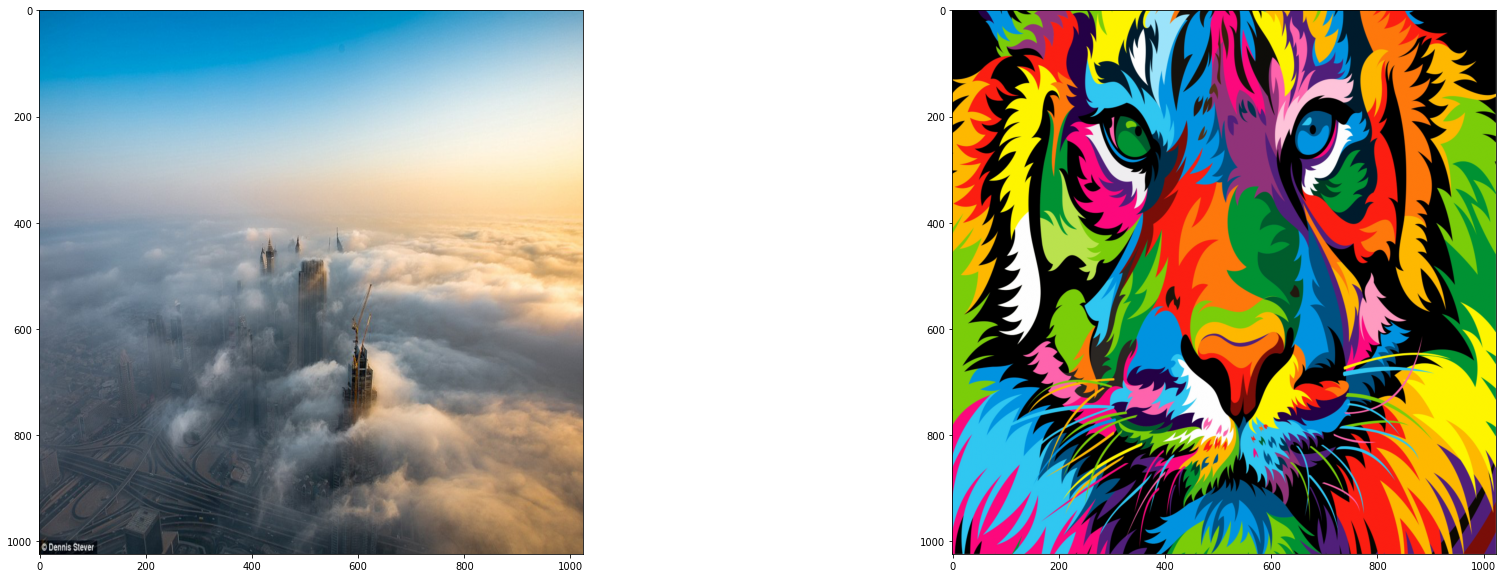

In [ ]:
content = transform.resize(plt.imread("content4.jpg"), (1024,1024))
style = transform.resize(plt.imread("style11.jpg"), content.shape)

plot_data([content, style])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[-0.212727    0.09960572  1.3885012 ]
  [-0.21017057  0.09726778  1.3867705 ]
  [-0.20698501  0.10155055  1.3742415 ]
  ...
  [ 0.3016778   0.42656904  1.0338237 ]
  [ 0.30315435  0.42923382  1.03949   ]
  [ 0.3037642   0.42842352  1.039831  ]]

 [[-0.21232852  0.10001799  1.3890249 ]
  [-0.20979941  0.0975842   1.3872852 ]
  [-0.20661834  0.10195233  1.3746241 ]
  ...
  [ 0.2986028   0.42645982  1.0334412 ]
  [ 0.3005685   0.4289132   1.0401119 ]
  [ 0.30134422  0.42878315  1.0399212 ]]

 [[-0.21352041  0.10130614  1.3905481 ]
  [-0.21087061  0.09878923  1.38878   ]
  [-0.20787823  0.10311019  1.3759034 ]
  ...
  [ 0.29435584  0.42508054  1.0393554 ]
  [ 0.2947653   0.4262689   1.0432415 ]
  [ 0.2962672   0.42676687  1.0446043 ]]

 ...

 [[ 1.2010033   1.2320067   1.3846089 ]
  [ 1.1964934   1.2494144   1.3897693 ]
  [ 1.2236865   1.2449023   1.4266208 ]
  ...
  [ 0.61498624  0.39492166  0.04159351]
  [ 0.5941351   0.37825757  0.02441698]
  [ 0.58476645  0.3710195   0.02145682]]

 [

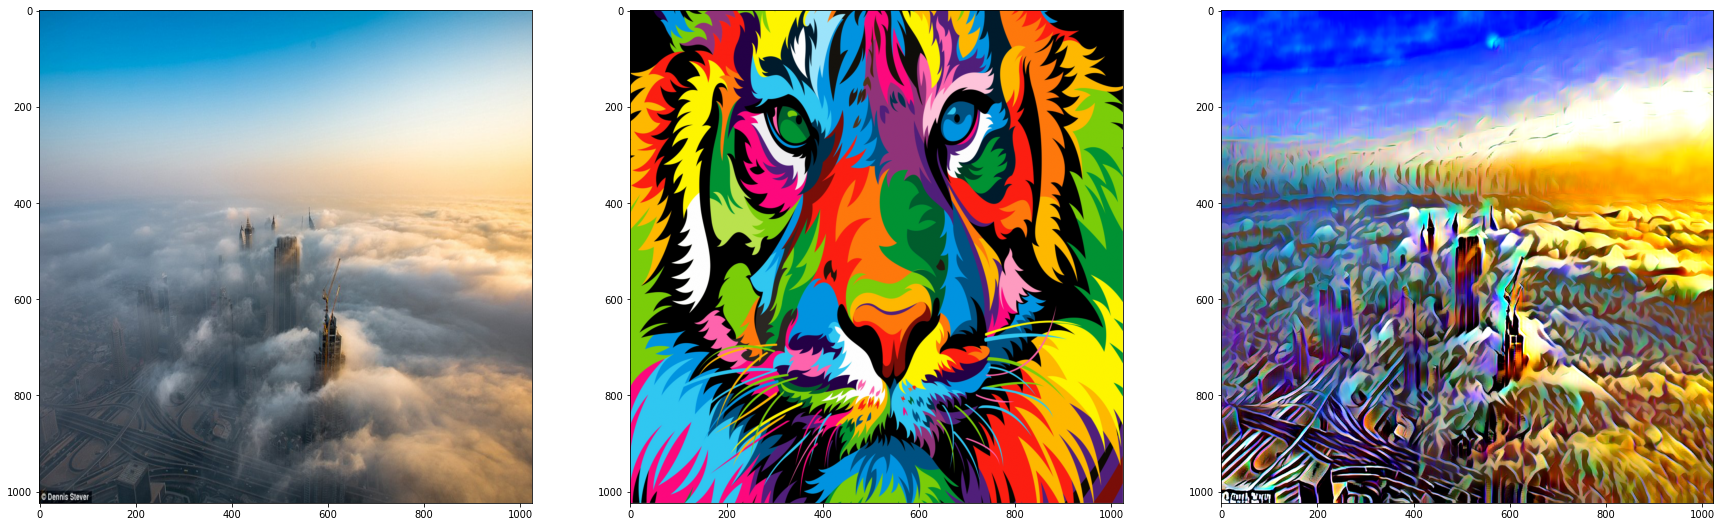

In [ ]:
def style_image(content, style, alpha = 1.0, plot = True,  preserve_color = False):
  if preserve_color:
    result = test(content, style, alpha, plot = False)
    result = preserve_color_stable(content, result)
    if plot:
      plot_data([content, style, result])
    return result
  else:
    result = test(content, style, alpha, plot)
    return result

In [ ]:
def style_interpolation(content, styles, weights, alpha = 1.0, plot = True, preserve_color = False):
  assert len(styles) == len(weights)
  assert sum(weights) > 0.99 and sum(weights) < 1.01
  assert [True for i in styles if i.shape == content.shape]

  toTensor = ToTensor()

  with torch.no_grad():
    x = torch.tensor(np.expand_dims(toTensor(content),0)).float().to(device)
    x = net.encode(x)

    for i,style in enumerate(styles):
      styles[i] = torch.tensor(np.expand_dims(toTensor(style),0)).float().to(device)

    for i,y in enumerate(styles):
      with torch.no_grad():
        y = net.encode(y)
        styles[i] = weights[i] * adaIN(x, y)
  
  result = torch.cat(styles)
  result = torch.sum(result, dim = 0, keepdims=True)

  if preserve_color:
    if plot:
      result = test(content, style, alpha, plot = False)
      result = preserve_color_stable(content, result)
    else:
      result = test(content, style, alpha, plot = False)
      return preserve_color_stable(content, result)
  else:
    if plot:
      result = test(content, result, alpha, plot = False, encode = False)
    else:
      return test(content, result, alpha, plot = False, encode = False)
  
  plot_data([content, result])
  return result

array([[[-0.16364054,  0.28434182,  0.58233253],
        [-0.16594976,  0.28496473,  0.58394544],
        [-0.16591738,  0.28528816,  0.58428035],
        ...,
        [ 0.19219872,  0.44055334,  0.62505851],
        [ 0.19067082,  0.43946166,  0.63394452],
        [ 0.19012765,  0.4387907 ,  0.63230041]],

       [[-0.16537605,  0.2846302 ,  0.58321262],
        [-0.16711169,  0.28497126,  0.58464248],
        [-0.16702342,  0.28526234,  0.58495638],
        ...,
        [ 0.19161079,  0.44010858,  0.62570402],
        [ 0.19036464,  0.43921245,  0.63412909],
        [ 0.18989391,  0.43861072,  0.63252994]],

       [[-0.16846673,  0.2857652 ,  0.58540581],
        [-0.16898903,  0.28564142,  0.58661229],
        [-0.16880681,  0.28585442,  0.58688359],
        ...,
        [ 0.19167727,  0.43995253,  0.62790953],
        [ 0.19082247,  0.43923863,  0.63449231],
        [ 0.19039692,  0.43868996,  0.63300609]],

       ...,

       [[ 1.16025772,  1.08606263,  0.70508863],
        [ 1

In [ ]:
import imageio
import imageio_ffmpeg
from tqdm.notebook import tqdm

def style_video(video_path, output_name, style, alpha = 1.0, preserve_color = False, custom_resolution = None):
  toTensor = ToTensor()

  reader = imageio.get_reader(video_path)
  resolution = None

  if custom_resolution is None:
    resolution = reader.get_meta_data()["source_size"]
  else:
    resolution = custom_resolution
  fps = reader.get_meta_data()["fps"]

  style = transform.resize(style,resolution)
  
  if not preserve_color:
    style_tensor = torch.tensor(np.expand_dims(toTensor(style), 0)).float().to(device)
    style_tensor = net.encode(style_tensor)
  
  frame_number = 0
  driving_video = []
  for frame_number in tqdm(range(reader.get_meta_data()['nframes'])):
    try:
      content = reader.get_next_data()
    except imageio.core.CannotReadFrameError:
      break
    except IndexError:
      break
    else:
      if custom_resolution is not None:
        content = transform.resize(content, list(resolution)[::-1])
      content = content.astype(float)/255
      if preserve_color:
        style_tensor = preserve_color_stable(content, style)
        style_tensor = torch.tensor(np.expand_dims(toTensor(style_tensor), 0)).float().to(device)
        style_tensor = net.encode(style_tensor)

      x = torch.tensor(toTensor(content)).unsqueeze(0).float().to(device)
      x = net.encode(x)
      result = adaIN(x, style_tensor)
      result = (1-alpha) * x + alpha * result
      result = test(content, result, alpha, False, False)
      result = cv2.convertScaleAbs(result*255)
      driving_video.append(result)
  reader.close()
  
  if output_name == None:
    return driving_video

  writer = imageio_ffmpeg.write_frames(f'{output_name}.mp4',
                                       (resolution), fps = fps,
                                       macro_block_size=1)
  writer.send(None)  # seed the generator
  for frame in driving_video:
    writer.send(frame)
  writer.close() 

style_video("landscape.mp4", "result2", style, 0.6)

In [ ]:
!ffmpeg -i landscape.mp4 -vn -acodec copy output_audio.aac
!ffmpeg -i result2.mp4 -i output_audio.aac -c:v copy -c:a aac output1.mp4

ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib